In [1]:
import matplotlib.pyplot as plt

In [2]:
import nibabel
import os
import numpy as np
import cv2

def readNIICTAll(data_path):
    images = os.listdir(data_path)
    training_masks = images[1::2]
    training_images = images[::2] 
    
    imgs_trainCT = [] 
    for Label, CT in zip(training_masks, training_images):
        training_mask = nibabel.load(os.path.join(data_path, Label))
        training_image = nibabel.load(os.path.join(data_path, CT)) 
        for k in range(training_mask.shape[2]):
            mask_2d = np.array(training_mask.get_data()[::2, ::2, k]) 
            image_2d = np.array(training_image.get_data()[::2, ::2, k])
            if len(np.unique(mask_2d)) != 1:
                imgs_trainCT.append(image_2d)
    return imgs_trainCT

def picsampleShow3(i,img1,img2,img3):

    fig, axs = plt.subplots(1,3, constrained_layout=True,figsize=(20,5))
    axs.flat[0].imshow(img1, cmap='gray')
    axs.flat[0].set_title("Img_ori = "+ str(i))
    axs.flat[1].imshow(img2, cmap='gray')
    axs.flat[1].set_title("Img_ori_Unit8 = "+ str(i))  
    axs.flat[2].imshow(img3, cmap='gray')
    axs.flat[2].set_title("predsActual = "+ str(i)) 

    
def picsampleShow4(i,img1,img2,img3,img4):

    fig, axs = plt.subplots(1,4, constrained_layout=True,figsize=(20,5))
    axs.flat[0].imshow(img1, cmap='gray')
    axs.flat[0].set_title("Img_ori_Unit8 = "+ str(i))
    axs.flat[1].imshow(img2, cmap='gray')
    axs.flat[1].set_title("predsActual = "+ str(i))  
    axs.flat[2].imshow(img3, cmap='gray')
    axs.flat[2].set_title("predsClip0T100 = "+ str(i)) 
    axs.flat[3].imshow(img4, cmap='gray')
    axs.flat[3].set_title("predsClip0T200 = "+ str(i)) 

In [3]:
path = 'DATA'
RawDataAll = readNIICTAll(path)

C:\Users\User\AppData\Local\Temp/ipykernel_28588/4249196631.py:16: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask_2d = np.array(training_mask.get_data()[::2, ::2, k])
C:\Users\User\AppData\Local\Temp/ipykernel_28588/4249196631.py:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  image_2d = np.array(training_image.get_data()[::2, ::2, k])


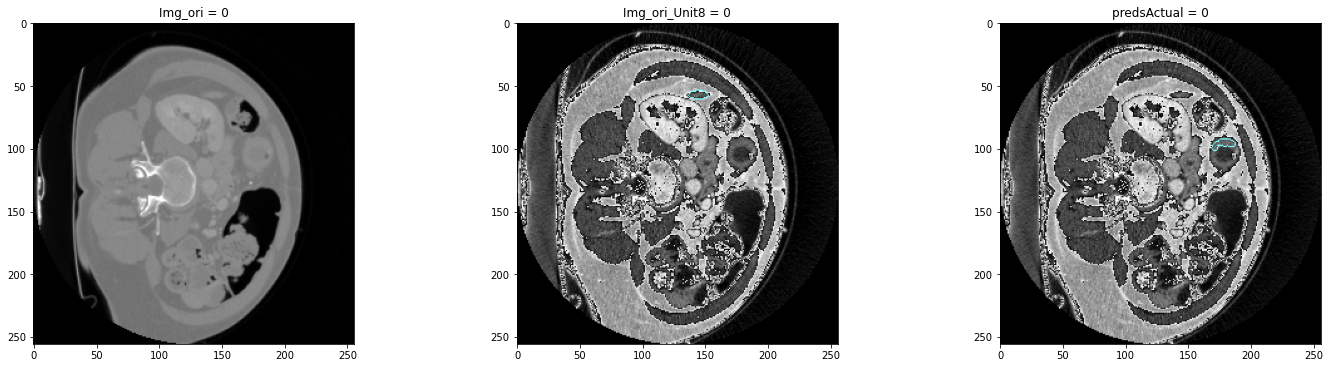

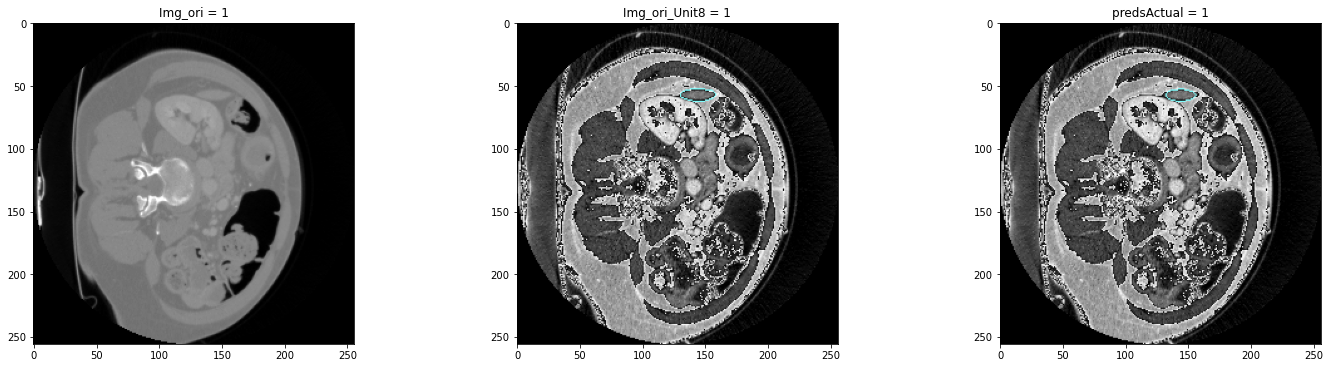

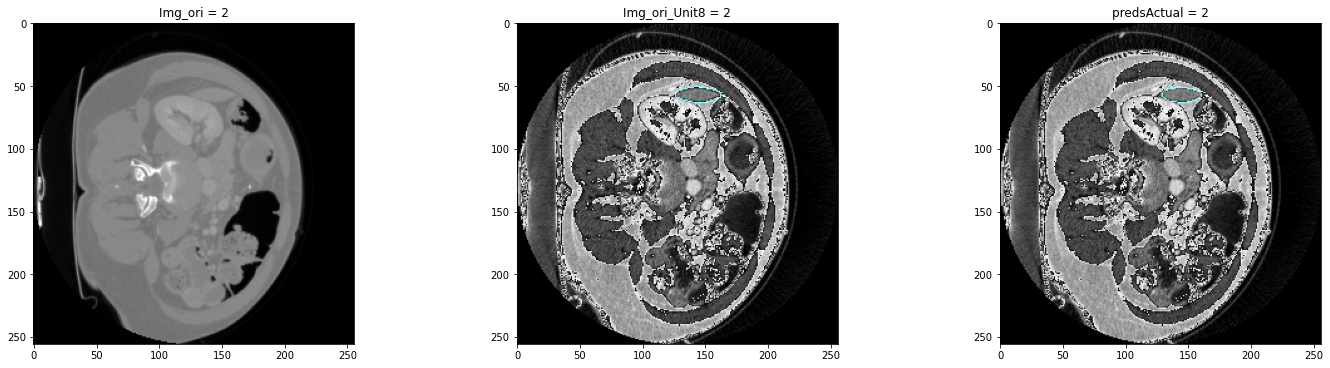

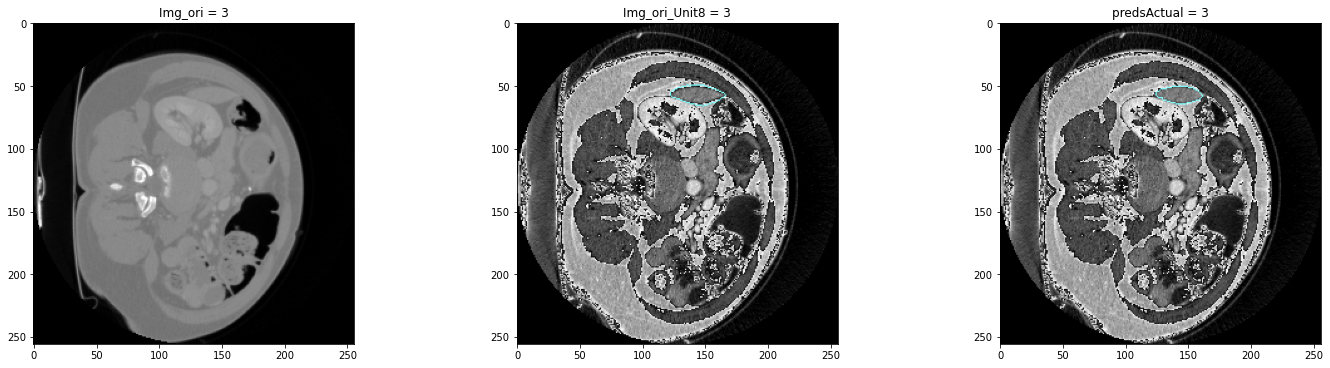

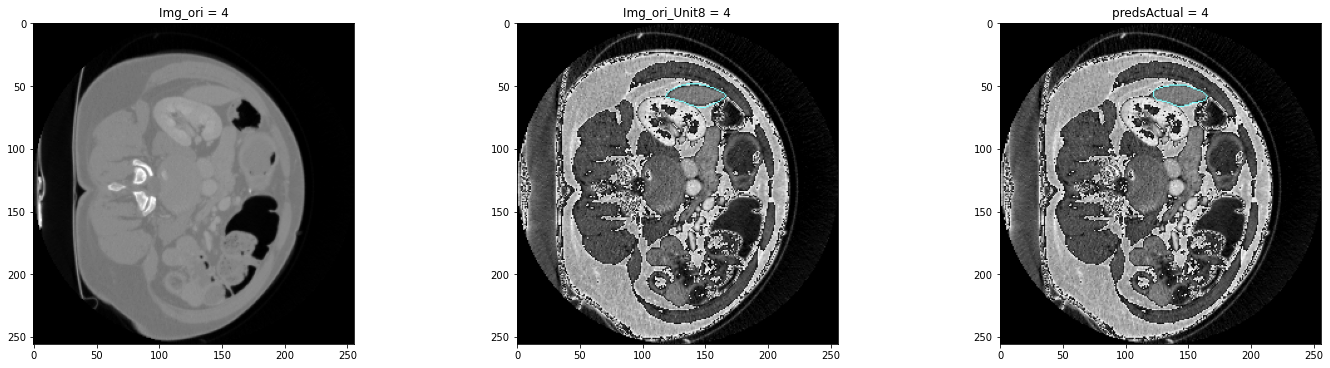

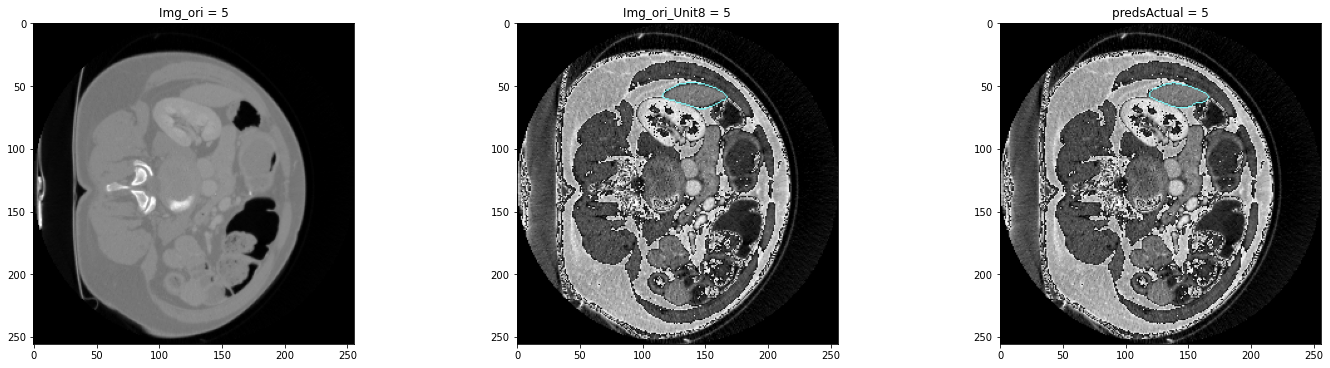

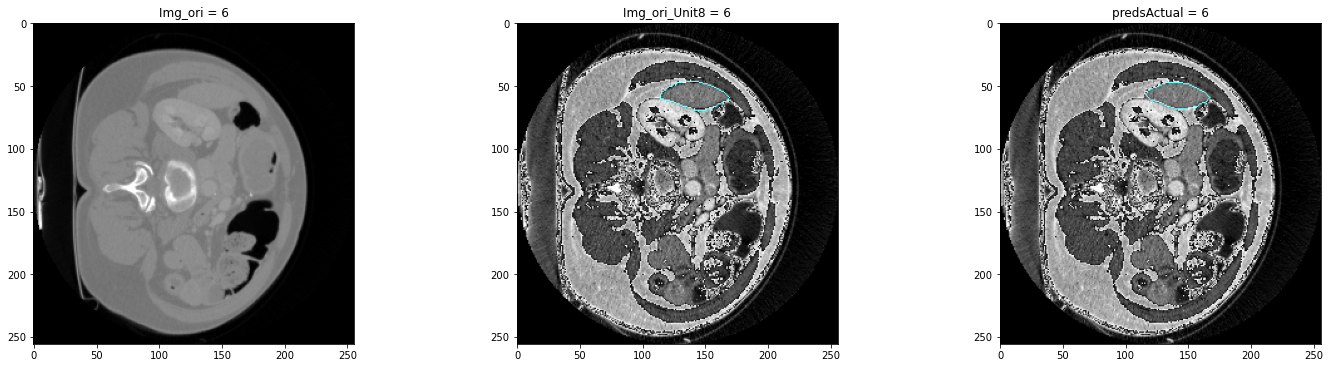

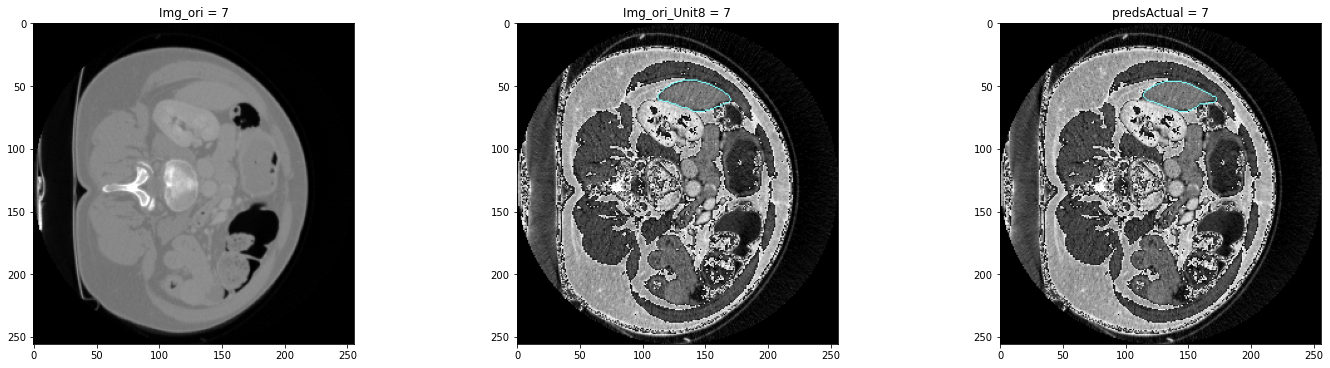

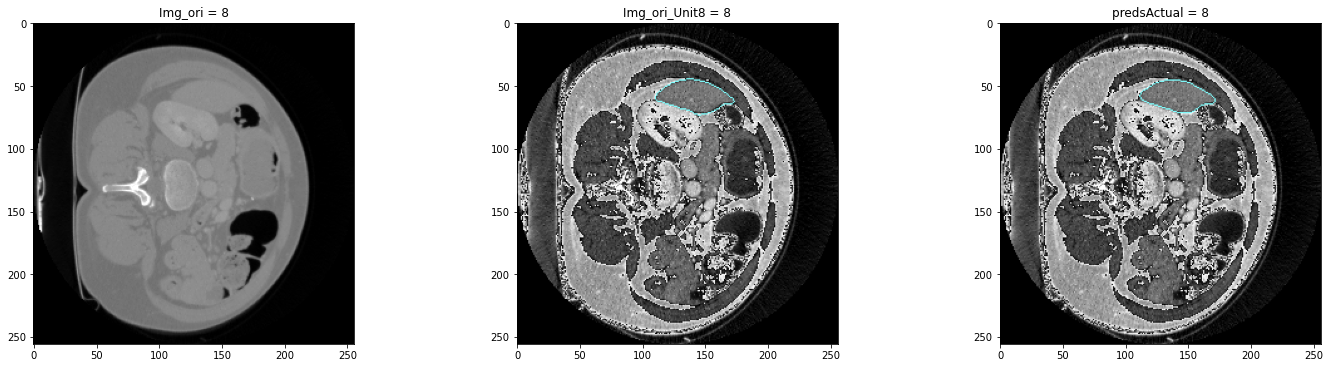

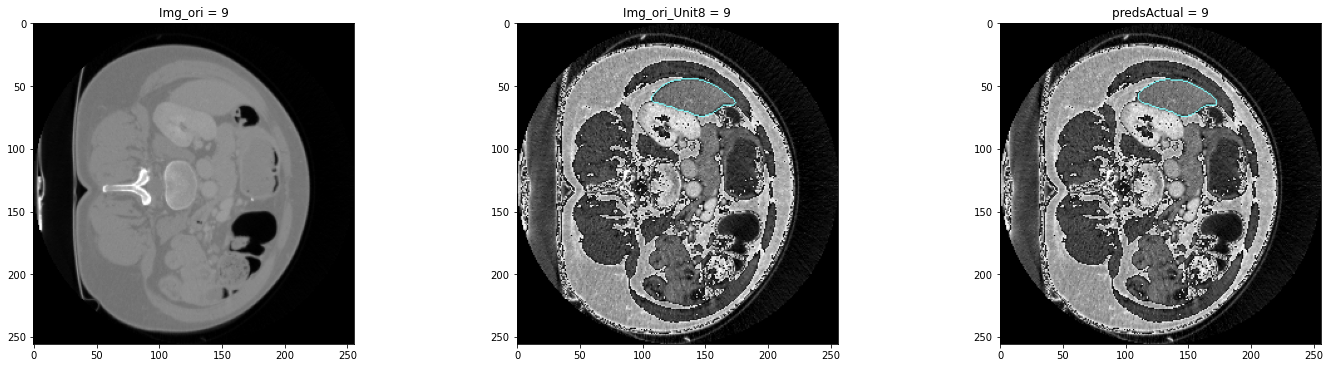

In [4]:
for i in range(0,10):
    path1 = r'Original/'+ str(i)+ '_Original.png'
    path2 = r'predsActual/'+ str(i)+ '_pred.png'
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    
    picsampleShow3(i,RawDataAll[i],img1,img2)
#Img_ori mean original CT DICOM convert to NIfTI(.nii)
#Img_ori_Unit8 mean Img_ori convert to dtype=np.uint8 and Label(from dataset)
#predsActual mean Img_ori_Unit8 and Label(from model train by Img_ori_Unit8)   

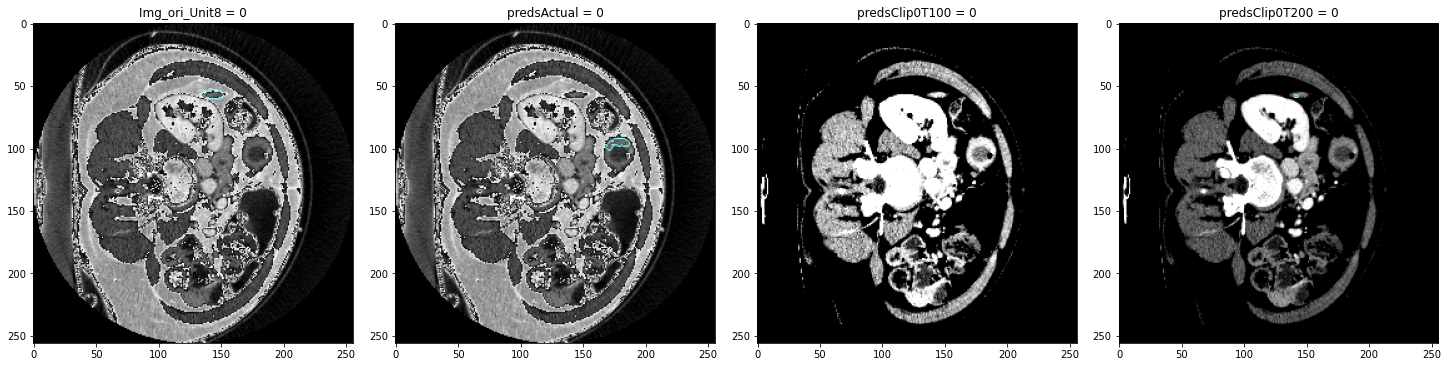

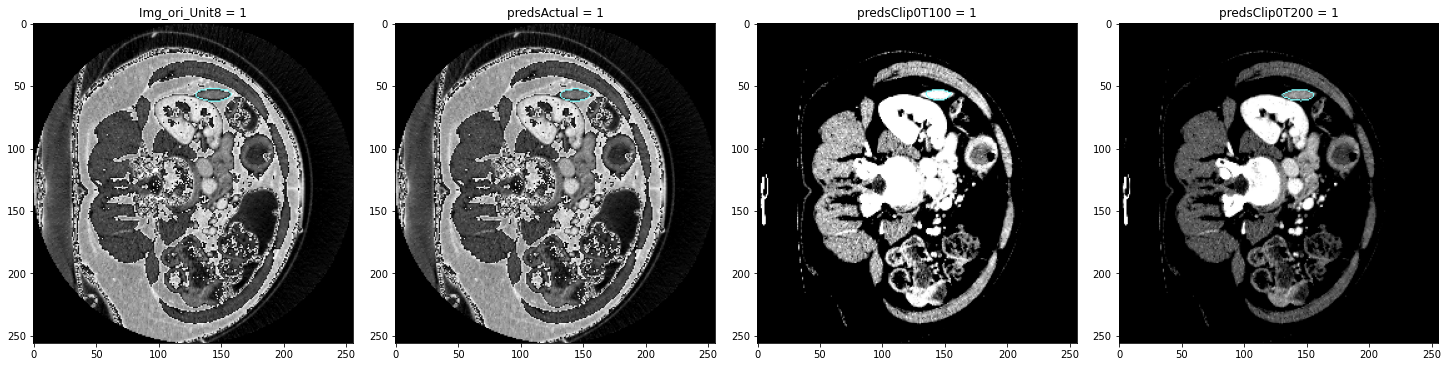

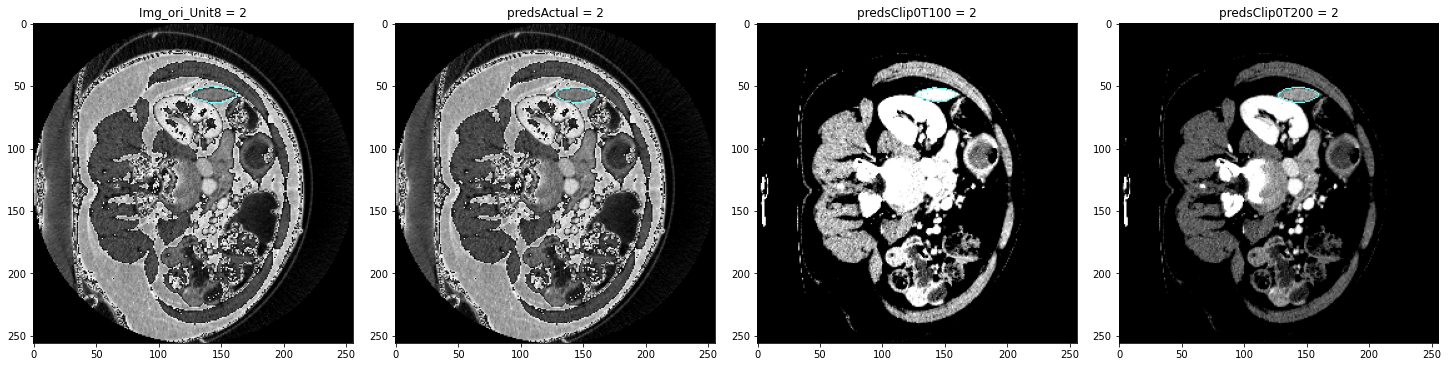

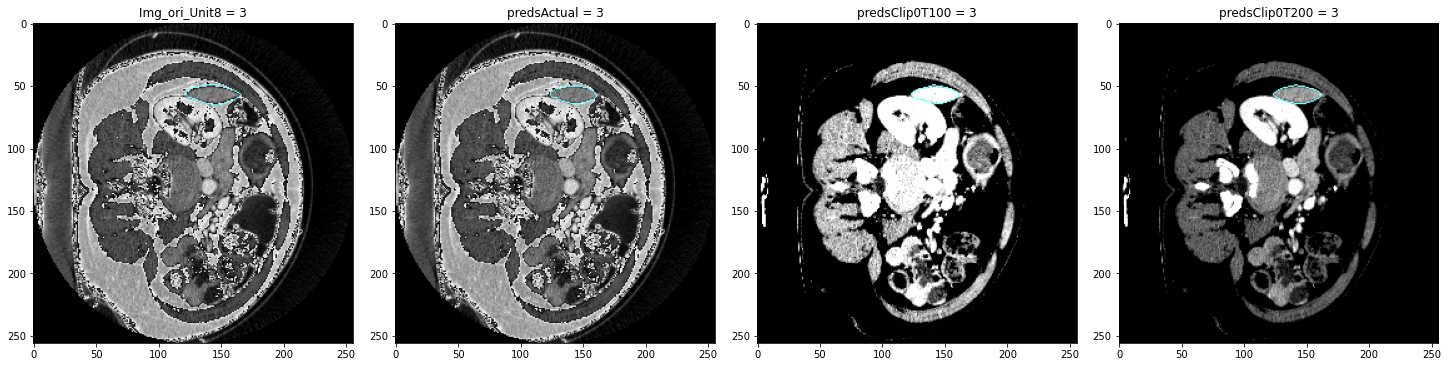

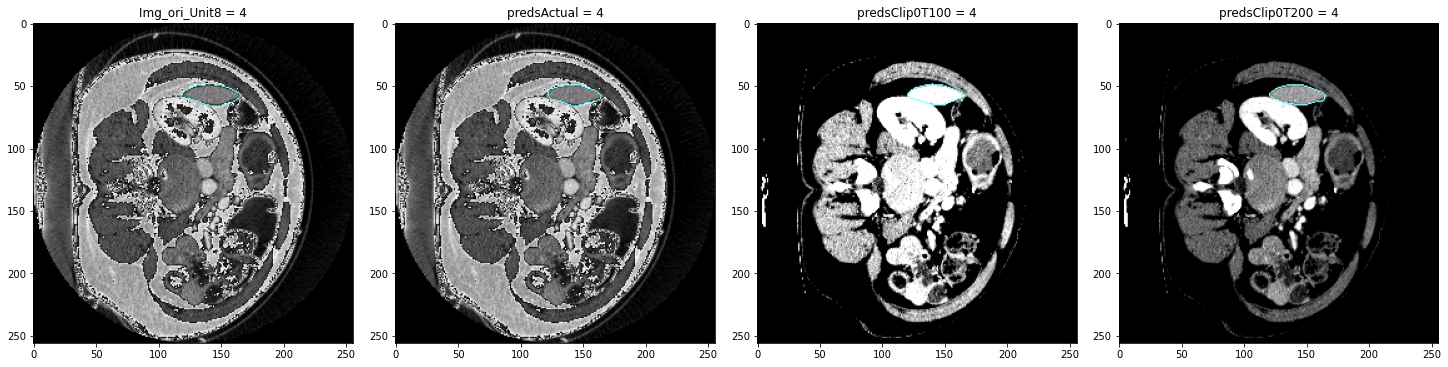

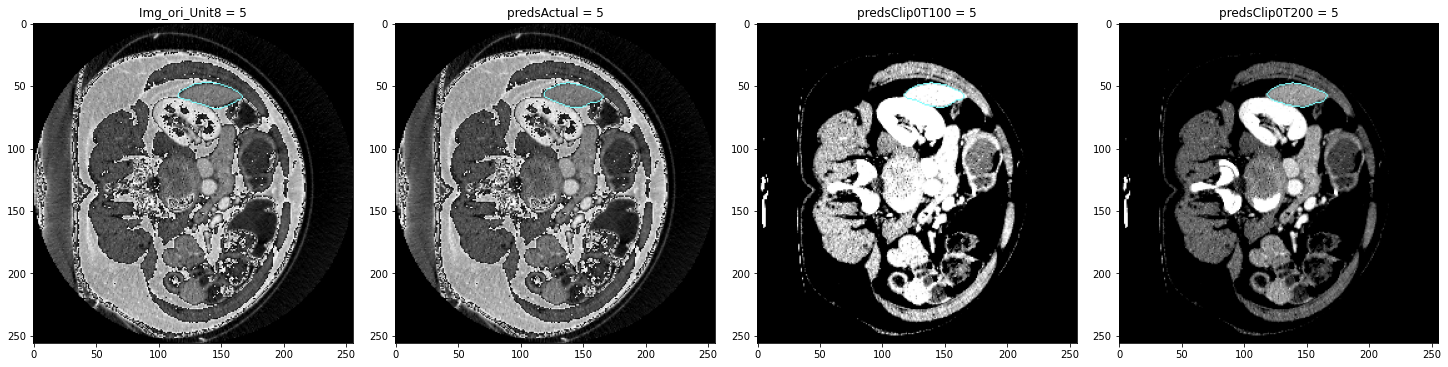

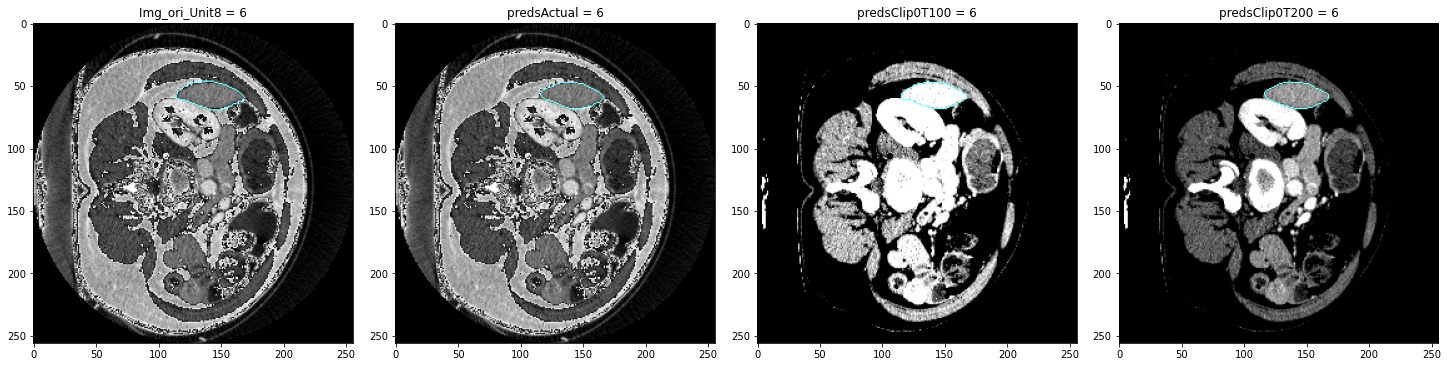

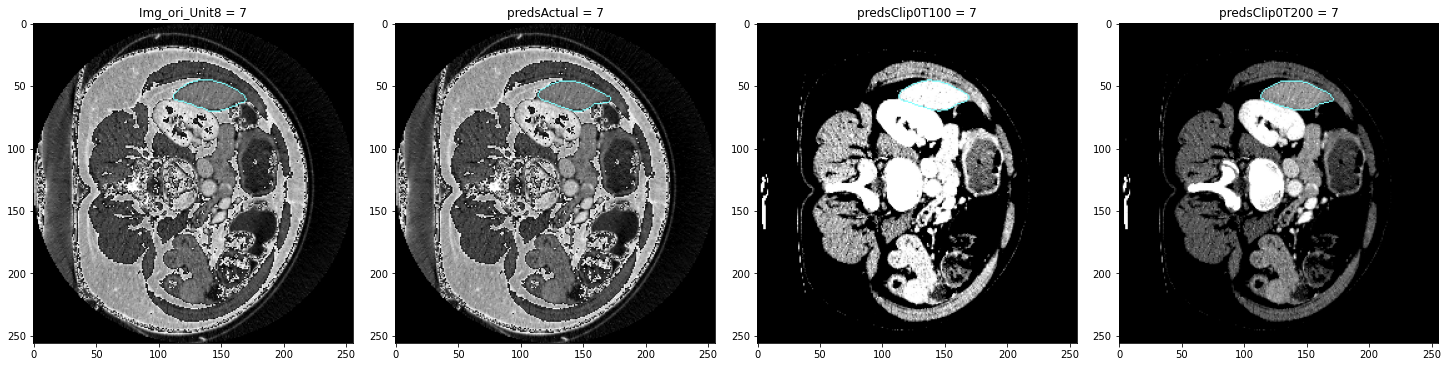

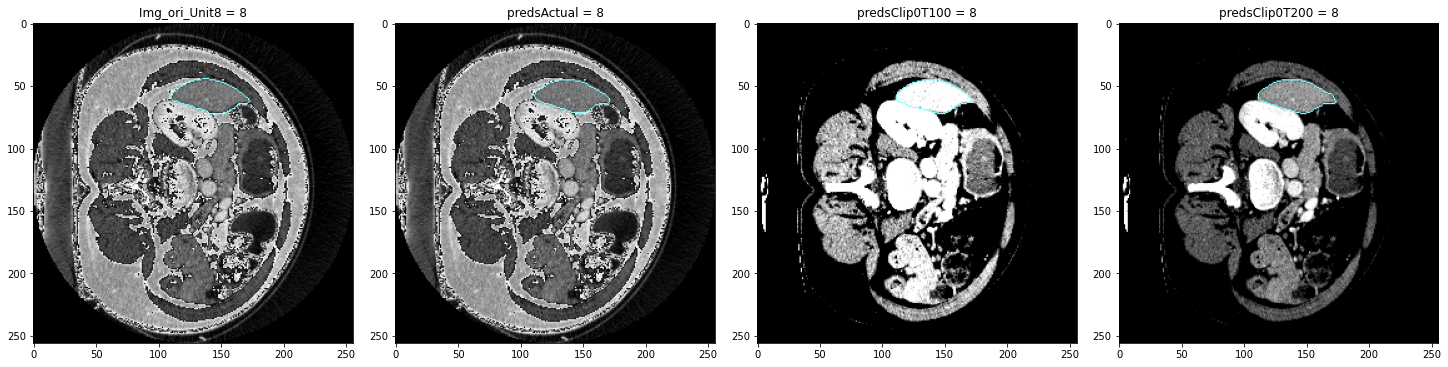

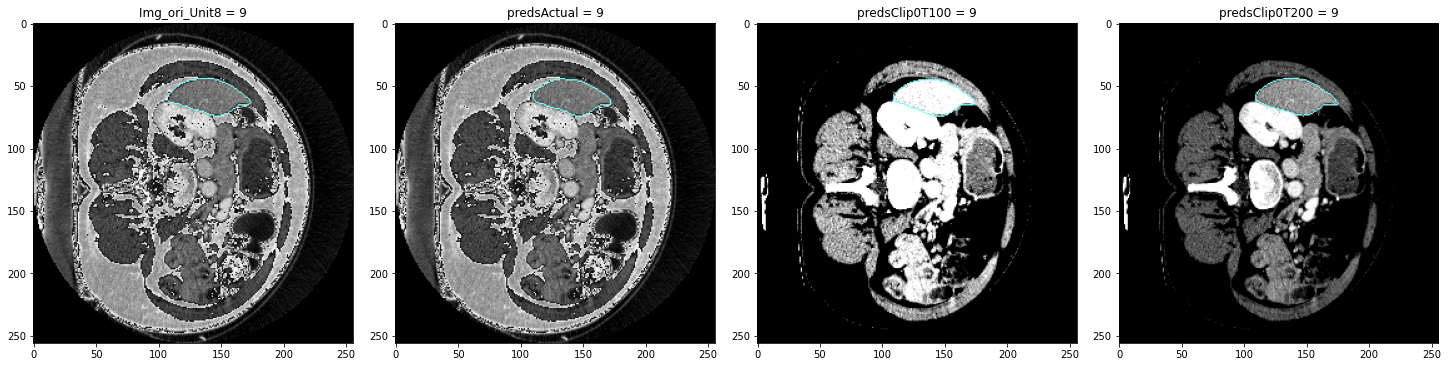

In [5]:
for i in range(0,10):
    path1 = r'Original/'+ str(i)+ '_Original.png'
    path2 = r'predsActual/'+ str(i)+ '_pred.png'
    path3 = r'predsClip0T100/'+ str(i)+ '_pred.png'
    path4 = r'predsClip0T200/'+ str(i)+ '_pred.png'
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)
    img3 = cv2.imread(path3)
    img4 = cv2.imread(path4)
    picsampleShow4(i,img1,img2,img3,img4)
#Img_ori_Unit8 mean Img_ori convert to dtype=np.uint8
#predsActual mean Img_ori_Unit8 and Label(from model train by Img_ori_Unit8) 
#predsClip0T100 mean 1)Img_ori data.clip(0,100) 0 HU to 100 HU
                   # 2)convert to dtype=np.uint8 and Label(from model train by data with clip 0,100)
#predsClip0T200 mean 1)Img_ori data.clip(0,200) 0 HU to 200 HU
                   # 2)convert to dtype=np.uint8 and Label(from model train by data with clip 0,200)

In [6]:
historyNoClip=np.load('historyNoClip.npy',allow_pickle='TRUE').item()
history0T100=np.load('history0T100.npy',allow_pickle='TRUE').item()
history0T200=np.load('history0T200.npy',allow_pickle='TRUE').item()

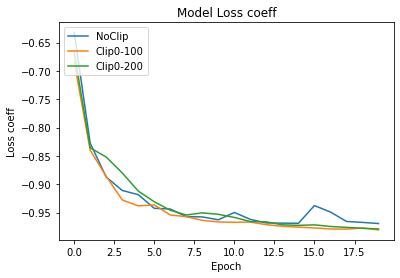

In [7]:
plt.plot(historyNoClip['loss'])
plt.plot(history0T100['loss'])
plt.plot(history0T200['loss'])
plt.title('Model Loss coeff')
plt.ylabel('Loss coeff')
plt.xlabel('Epoch')
plt.legend(['NoClip', 'Clip0-100','Clip0-200'], loc='upper left')
plt.show()

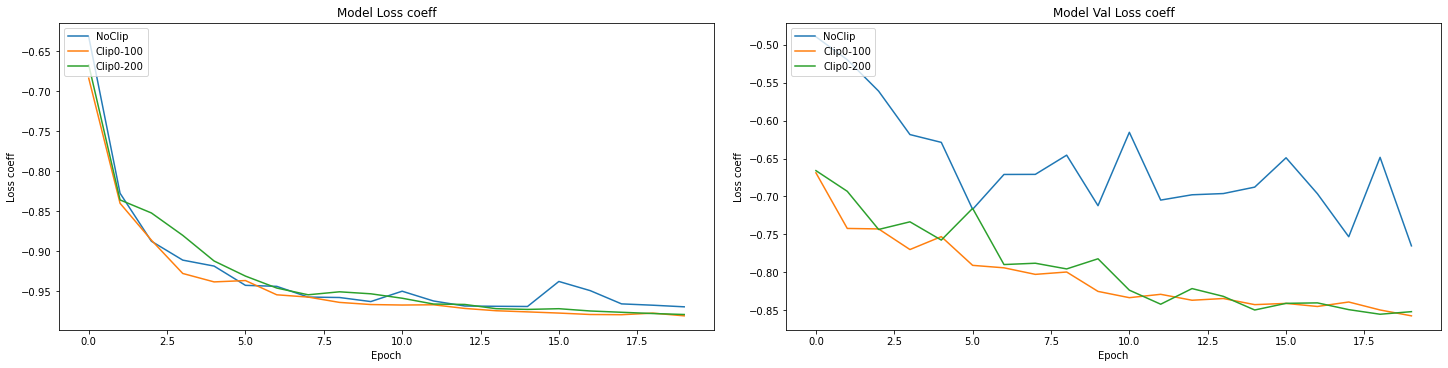

In [8]:
fig, axs = plt.subplots(1,2, constrained_layout=True,figsize=(20,5))
axs.flat[0].plot(historyNoClip['loss'])
axs.flat[0].plot(history0T100['loss'])
axs.flat[0].plot(history0T200['loss'])
axs.flat[0].set_title('Model Loss coeff')
axs.flat[0].set_ylabel('Loss coeff')
axs.flat[0].set_xlabel('Epoch')
axs.flat[0].legend(['NoClip', 'Clip0-100','Clip0-200'], loc='upper left')


axs.flat[1].plot(historyNoClip['val_loss'])
axs.flat[1].plot(history0T100['val_loss'])
axs.flat[1].plot(history0T200['val_loss'])
axs.flat[1].set_title('Model Val Loss coeff')
axs.flat[1].set_ylabel('Loss coeff')
axs.flat[1].set_xlabel('Epoch')
axs.flat[1].legend(['NoClip', 'Clip0-100','Clip0-200'], loc='upper left') 

In [9]:
print('Loss')
print('NoClip    = ',historyNoClip['loss'][19])
print('Clip0-100 = ',history0T100['loss'][19])
print('Clip0-200 = ',history0T200['loss'][19])

print('Val Loss')
print('NoClip    = ',historyNoClip['val_loss'][19])
print('Clip0-100 = ',history0T100['val_loss'][19])
print('Clip0-200 = ',history0T200['val_loss'][19])


Loss
NoClip    =  -0.9693745970726013
Clip0-100 =  -0.980652391910553
Clip0-200 =  -0.9789756536483765
Val Loss
NoClip    =  -0.7650558352470398
Clip0-100 =  -0.8572665452957153
Clip0-200 =  -0.8517553806304932


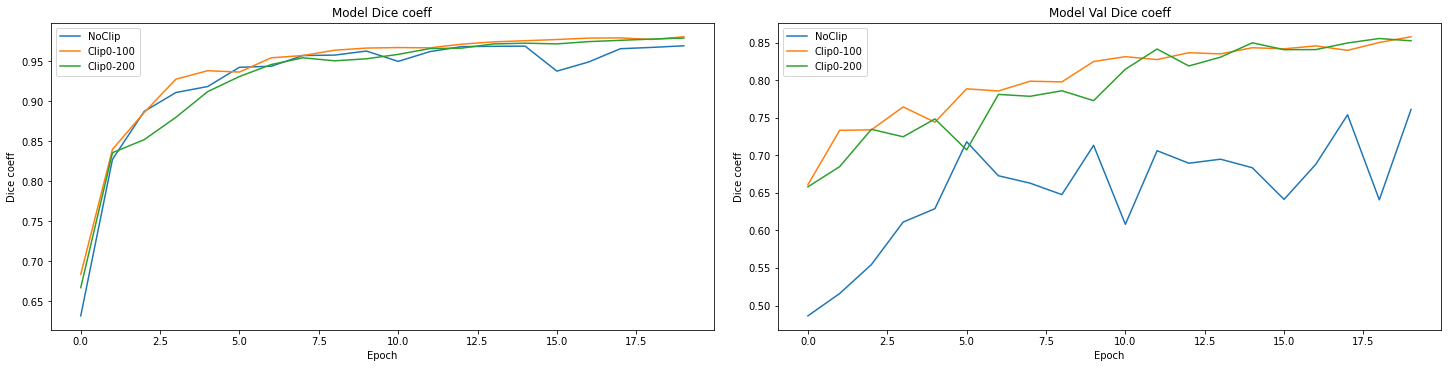

In [10]:
fig, axs = plt.subplots(1,2, constrained_layout=True,figsize=(20,5))
axs.flat[0].plot(historyNoClip['dice_coef'])
axs.flat[0].plot(history0T100['dice_coef'])
axs.flat[0].plot(history0T200['dice_coef'])
axs.flat[0].set_title('Model Dice coeff')
axs.flat[0].set_ylabel('Dice coeff')
axs.flat[0].set_xlabel('Epoch')
axs.flat[0].legend(['NoClip', 'Clip0-100','Clip0-200'], loc='upper left')


axs.flat[1].plot(historyNoClip['val_dice_coef'])
axs.flat[1].plot(history0T100['val_dice_coef'])
axs.flat[1].plot(history0T200['val_dice_coef'])
axs.flat[1].set_title('Model Val Dice coeff')
axs.flat[1].set_ylabel('Dice coeff')
axs.flat[1].set_xlabel('Epoch')
axs.flat[1].legend(['NoClip', 'Clip0-100','Clip0-200'], loc='upper left') 

In [11]:
print('Dice')
print('NoClip    = ',historyNoClip['dice_coef'][19])
print('Clip0-100 = ',history0T100['dice_coef'][19])
print('Clip0-200 = ',history0T200['dice_coef'][19])

print('Val Dice')
print('NoClip    = ',historyNoClip['val_dice_coef'][19])
print('Clip0-100 = ',history0T100['val_dice_coef'][19])
print('Clip0-200 = ',history0T200['val_dice_coef'][19])


Dice
NoClip    =  0.9693701863288879
Clip0-100 =  0.9806514978408813
Clip0-200 =  0.9789754748344421
Val Dice
NoClip    =  0.7610016465187073
Clip0-100 =  0.8578717112541199
Clip0-200 =  0.8524880409240723


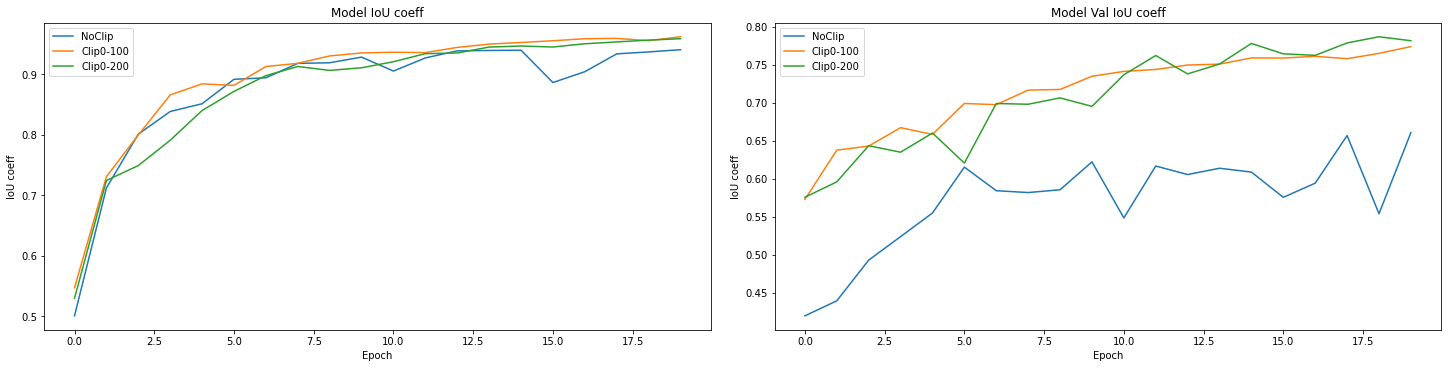

In [12]:
fig, axs = plt.subplots(1,2, constrained_layout=True,figsize=(20,5))
axs.flat[0].plot(historyNoClip['iou_coef'])
axs.flat[0].plot(history0T100['iou_coef'])
axs.flat[0].plot(history0T200['iou_coef'])
axs.flat[0].set_title('Model IoU coeff')
axs.flat[0].set_ylabel('IoU coeff')
axs.flat[0].set_xlabel('Epoch')
axs.flat[0].legend(['NoClip', 'Clip0-100','Clip0-200'], loc='upper left')


axs.flat[1].plot(historyNoClip['val_iou_coef'])
axs.flat[1].plot(history0T100['val_iou_coef'])
axs.flat[1].plot(history0T200['val_iou_coef'])
axs.flat[1].set_title('Model Val IoU coeff')
axs.flat[1].set_ylabel('IoU coeff')
axs.flat[1].set_xlabel('Epoch')
axs.flat[1].legend(['NoClip', 'Clip0-100','Clip0-200'], loc='upper left') 

In [13]:
print('IoU')
print('NoClip    = ',historyNoClip['iou_coef'][19])
print('Clip0-100 = ',history0T100['iou_coef'][19])
print('Clip0-200 = ',history0T200['iou_coef'][19])

print('Val IoU')
print('NoClip    = ',historyNoClip['val_iou_coef'][19])
print('Clip0-100 = ',history0T100['val_iou_coef'][19])
print('Clip0-200 = ',history0T200['val_iou_coef'][19])


IoU
NoClip    =  0.9406803250312805
Clip0-100 =  0.9620576500892639
Clip0-200 =  0.9588418006896973
Val IoU
NoClip    =  0.6610726714134216
Clip0-100 =  0.774163544178009
Clip0-200 =  0.7819272875785828
